<a href="https://colab.research.google.com/github/JonPaulBIlbao/Machine-Learning-in-Finance-Python-2026/blob/main/00.%20Intro%20to%20Python/00_02_Excel_python_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Finance**
**Deusto Business School**

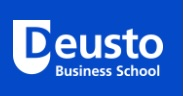

ADE + FAB

---

## Working with Excel Files using Python & pandas

### 1. Introduction
This notebook introduces how to read, clean, transform, and export Excel files using Python and pandas.

In [ ]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

### 2. Reading Excel files

In [ ]:
file_path = 'https://raw.githubusercontent.com/JonPaulBilbao/Machine-Learning-in-Finance-Python-2026/main/Datasets/Financial_Sample.xlsx'  # Upload or adjust path

df = pd.read_excel(file_path)
df.head()

### Inspecting structure

In [ ]:
df.info()

### 3. Create new variables

In [ ]:
# Create a new variable: total sales
df["Sales"] = df["Units Sold"] * df["Sale Price"]

# Create a second variable: net sales
df["Sales_net"] = df["Sales"] - df["Discounts"]

# Show the first rows
df.head()

### 4. Subset: Sales to Canada

In [ ]:
data_canada = df[df['Country'] == 'Canada']
len(data_canada)

### 5. Export to Excel

In [ ]:
data_canada.to_excel('data_canada_NEW.xlsx', index=False)

### 7. Create Excel with multiple sheets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sales_by_country = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)

with pd.ExcelWriter("/content/drive/MyDrive/financial_output.xlsx") as writer:
    df.to_excel(writer, sheet_name='full_data', index=False)
    data_canada.to_excel(writer, sheet_name='canada', index=False)
    sales_by_country.to_excel(writer, sheet_name='country_sales')

### 8. Date-based filename

In [ ]:
filename = f"data_canada_{date.today()}.xlsx"
data_canada.to_excel(filename, index=False)
filename

### 9. Basic visualization

In [ ]:
sales_by_country.plot(kind='bar', figsize=(10,4))
plt.title('Sales by Country')
plt.show()